In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense

# Data preprocessing

In [2]:
data = pd.read_csv("MODEL_DATA_final.csv",sep=";", decimal='.')
data.head()

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,CPL_meV,CPL_cm-1
0,ND3X0.0,-0.0004,-0.0002,3.0,0,0.0066,6.6,53.232564
1,ND3X0.2,-0.0004,0.5391,3.0,0,0.0063,6.3,50.812902
2,ND3X0.4,-0.0004,1.0784,3.0,0,0.0057,5.7,45.973578
3,ND3X0.6,-0.0004,1.6178,3.0,0,0.0049,4.9,39.521146
4,ND3X0.8,-0.0004,2.1571,3.0,0,0.0041,4.1,33.068714


In [3]:
data.shape

(10584, 8)

In [4]:
X = data[["Xshift","Yshift","Zshift","alpha_deg"]].values
Y = data["CPL_cm-1"].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.astype(float) ,Y, test_size=0.2)

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [7]:
type(y_train[0])

numpy.float64

In [8]:
X_train.shape[1]

4

In [25]:
y_train

array([  7.258986,   4.839324,  -7.258986, ..., -21.776958,   8.872094,
         0.      ])

# Neural Netowork

In [9]:
model = Sequential()
model.add(Dense(512, input_shape=(4,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [10]:
model.compile(loss='mse', optimizer='adam')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 177,153
Trainable params: 177,153
Non-trai

In [12]:
num_epochs = 1000

In [13]:
#callback = EarlyStopping(monitor="val_loss", patience=100, verbose=1)

In [14]:
%%time
history = model.fit(X_train,y_train,epochs=num_epochs,validation_split = 0.1)

Epoch 1/1000
239/239 [==============================] - 1s 3ms/step - loss: 94.8209 - val_loss: 70.6773
Epoch 2/1000
239/239 [==============================] - 1s 3ms/step - loss: 78.4533 - val_loss: 75.1136
Epoch 3/1000
239/239 [==============================] - 1s 2ms/step - loss: 68.9405 - val_loss: 55.1007
Epoch 4/1000
239/239 [==============================] - 1s 3ms/step - loss: 65.5108 - val_loss: 53.7808
Epoch 5/1000
239/239 [==============================] - 1s 3ms/step - loss: 64.2065 - val_loss: 58.8662
Epoch 6/1000
239/239 [==============================] - 1s 3ms/step - loss: 62.5884 - val_loss: 66.3637
Epoch 7/1000
239/239 [==============================] - 1s 3ms/step - loss: 59.0423 - val_loss: 53.9513
Epoch 8/1000
239/239 [==============================] - 1s 3ms/step - loss: 56.8612 - val_loss: 46.4381
Epoch 9/1000
239/239 [==============================] - 1s 3ms/step - loss: 61.2709 - val_loss: 53.8532
Epoch 10/1000
239/239 [==============================] - 1s 3ms/

239/239 [==============================] - 1s 3ms/step - loss: 31.0806 - val_loss: 29.0394
Epoch 80/1000
239/239 [==============================] - 1s 2ms/step - loss: 31.0402 - val_loss: 20.0953
Epoch 81/1000
239/239 [==============================] - 1s 2ms/step - loss: 28.6057 - val_loss: 23.6581
Epoch 82/1000
239/239 [==============================] - 1s 2ms/step - loss: 28.2930 - val_loss: 20.1786
Epoch 83/1000
239/239 [==============================] - 1s 2ms/step - loss: 27.4690 - val_loss: 21.2633
Epoch 84/1000
239/239 [==============================] - 1s 2ms/step - loss: 27.7367 - val_loss: 17.9651
Epoch 85/1000
239/239 [==============================] - 1s 2ms/step - loss: 26.6933 - val_loss: 17.7466
Epoch 86/1000
239/239 [==============================] - 1s 3ms/step - loss: 26.3516 - val_loss: 22.5837
Epoch 87/1000
239/239 [==============================] - 1s 3ms/step - loss: 29.2660 - val_loss: 20.2959
Epoch 88/1000
239/239 [==============================] - 1s 3ms/step 

Epoch 157/1000
239/239 [==============================] - 1s 2ms/step - loss: 11.1264 - val_loss: 49.9656
Epoch 158/1000
239/239 [==============================] - 1s 2ms/step - loss: 37.2179 - val_loss: 25.4234
Epoch 159/1000
239/239 [==============================] - 1s 2ms/step - loss: 31.9407 - val_loss: 22.0800
Epoch 160/1000
239/239 [==============================] - 1s 3ms/step - loss: 28.9794 - val_loss: 21.3858
Epoch 161/1000
239/239 [==============================] - 1s 2ms/step - loss: 27.2735 - val_loss: 20.0479
Epoch 162/1000
239/239 [==============================] - 1s 2ms/step - loss: 24.2307 - val_loss: 17.5583
Epoch 163/1000
239/239 [==============================] - 1s 2ms/step - loss: 18.4090 - val_loss: 13.3363
Epoch 164/1000
239/239 [==============================] - 1s 3ms/step - loss: 13.9474 - val_loss: 29.7243
Epoch 165/1000
239/239 [==============================] - 1s 3ms/step - loss: 19.4745 - val_loss: 7.3067
Epoch 166/1000
239/239 [=======================

239/239 [==============================] - 1s 3ms/step - loss: 0.5034 - val_loss: 0.4230
Epoch 236/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3639 - val_loss: 0.8009
Epoch 237/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.4193 - val_loss: 0.4403
Epoch 238/1000
239/239 [==============================] - 1s 3ms/step - loss: 19.5276 - val_loss: 23.7063
Epoch 239/1000
239/239 [==============================] - 1s 3ms/step - loss: 24.1797 - val_loss: 18.4676
Epoch 240/1000
239/239 [==============================] - 1s 3ms/step - loss: 18.4441 - val_loss: 11.2005
Epoch 241/1000
239/239 [==============================] - 1s 3ms/step - loss: 31.3622 - val_loss: 17.2272
Epoch 242/1000
239/239 [==============================] - 1s 3ms/step - loss: 15.2090 - val_loss: 10.7003
Epoch 243/1000
239/239 [==============================] - 1s 3ms/step - loss: 8.0919 - val_loss: 10.0108
Epoch 244/1000
239/239 [==============================] - 1s 3ms/ste

239/239 [==============================] - 1s 3ms/step - loss: 0.4588 - val_loss: 0.6540
Epoch 314/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.5497 - val_loss: 0.4878
Epoch 315/1000
239/239 [==============================] - 1s 3ms/step - loss: 4.8271 - val_loss: 50.2571
Epoch 316/1000
239/239 [==============================] - 1s 3ms/step - loss: 44.2941 - val_loss: 25.7208
Epoch 317/1000
239/239 [==============================] - 1s 3ms/step - loss: 34.2540 - val_loss: 25.5908
Epoch 318/1000
239/239 [==============================] - 1s 3ms/step - loss: 32.6918 - val_loss: 24.2087
Epoch 319/1000
239/239 [==============================] - 1s 3ms/step - loss: 31.4232 - val_loss: 23.4114
Epoch 320/1000
239/239 [==============================] - 1s 3ms/step - loss: 29.7097 - val_loss: 23.2672
Epoch 321/1000
239/239 [==============================] - 1s 3ms/step - loss: 30.4948 - val_loss: 22.1889
Epoch 322/1000
239/239 [==============================] - 1s 3ms/s

239/239 [==============================] - 1s 3ms/step - loss: 28.9426 - val_loss: 10.6370
Epoch 392/1000
239/239 [==============================] - 1s 3ms/step - loss: 17.6718 - val_loss: 9.1703
Epoch 393/1000
239/239 [==============================] - 1s 3ms/step - loss: 17.5399 - val_loss: 23.5047
Epoch 394/1000
239/239 [==============================] - 1s 3ms/step - loss: 23.6823 - val_loss: 26.9267
Epoch 395/1000
239/239 [==============================] - 1s 3ms/step - loss: 30.0580 - val_loss: 18.8151
Epoch 396/1000
239/239 [==============================] - 1s 3ms/step - loss: 26.0513 - val_loss: 19.9942
Epoch 397/1000
239/239 [==============================] - 1s 3ms/step - loss: 20.0505 - val_loss: 8.2880
Epoch 398/1000
239/239 [==============================] - 1s 3ms/step - loss: 11.3456 - val_loss: 11.4403
Epoch 399/1000
239/239 [==============================] - 1s 3ms/step - loss: 10.9560 - val_loss: 3.6929
Epoch 400/1000
239/239 [==============================] - 1s 3ms

239/239 [==============================] - 1s 2ms/step - loss: 0.3218 - val_loss: 0.4961
Epoch 470/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3341 - val_loss: 0.5094
Epoch 471/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.2776 - val_loss: 0.2736
Epoch 472/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.8051 - val_loss: 27.2837
Epoch 473/1000
239/239 [==============================] - 1s 3ms/step - loss: 37.8597 - val_loss: 24.5796
Epoch 474/1000
239/239 [==============================] - 1s 2ms/step - loss: 25.5018 - val_loss: 13.1794
Epoch 475/1000
239/239 [==============================] - 1s 2ms/step - loss: 25.4309 - val_loss: 18.5434
Epoch 476/1000
239/239 [==============================] - 1s 3ms/step - loss: 26.0281 - val_loss: 13.6865
Epoch 477/1000
239/239 [==============================] - 1s 2ms/step - loss: 23.0592 - val_loss: 9.5109
Epoch 478/1000
239/239 [==============================] - 1s 3ms/step

239/239 [==============================] - 1s 3ms/step - loss: 14.0450 - val_loss: 1.0609
Epoch 548/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.9964 - val_loss: 0.4369
Epoch 549/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.4090 - val_loss: 0.3175
Epoch 550/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.2846 - val_loss: 0.2855
Epoch 551/1000
239/239 [==============================] - 1s 2ms/step - loss: 0.2626 - val_loss: 0.2758
Epoch 552/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.2927 - val_loss: 0.5971
Epoch 553/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.6394 - val_loss: 0.5584
Epoch 554/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3218 - val_loss: 0.7893
Epoch 555/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3816 - val_loss: 0.4339
Epoch 556/1000
239/239 [==============================] - 1s 3ms/step - loss: 

239/239 [==============================] - 1s 3ms/step - loss: 0.7344 - val_loss: 0.4503
Epoch 626/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.5324 - val_loss: 1.0356
Epoch 627/1000
239/239 [==============================] - 1s 3ms/step - loss: 7.9140 - val_loss: 9.2561
Epoch 628/1000
239/239 [==============================] - 1s 3ms/step - loss: 5.5066 - val_loss: 0.9022
Epoch 629/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.8084 - val_loss: 0.4127
Epoch 630/1000
239/239 [==============================] - 1s 2ms/step - loss: 11.6319 - val_loss: 0.6567
Epoch 631/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.9388 - val_loss: 0.3856
Epoch 632/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.4498 - val_loss: 0.4018
Epoch 633/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3425 - val_loss: 0.2714
Epoch 634/1000
239/239 [==============================] - 1s 3ms/step - loss: 

239/239 [==============================] - 1s 3ms/step - loss: 18.5565 - val_loss: 6.5696
Epoch 704/1000
239/239 [==============================] - 1s 3ms/step - loss: 5.4087 - val_loss: 1.6975
Epoch 705/1000
239/239 [==============================] - 1s 3ms/step - loss: 1.3741 - val_loss: 0.8385
Epoch 706/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.6676 - val_loss: 0.6475
Epoch 707/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.5487 - val_loss: 0.5037
Epoch 708/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.4875 - val_loss: 0.4143
Epoch 709/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.4102 - val_loss: 0.4629
Epoch 710/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.4100 - val_loss: 0.4916
Epoch 711/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3504 - val_loss: 0.3179
Epoch 712/1000
239/239 [==============================] - 1s 3ms/step - loss: 

239/239 [==============================] - 1s 3ms/step - loss: 0.4367 - val_loss: 0.4555
Epoch 782/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.2701 - val_loss: 0.4122
Epoch 783/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3083 - val_loss: 0.3548
Epoch 784/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3292 - val_loss: 0.3380
Epoch 785/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.2925 - val_loss: 0.9310
Epoch 786/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.4195 - val_loss: 1.8037
Epoch 787/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.4966 - val_loss: 0.3526
Epoch 788/1000
239/239 [==============================] - 1s 3ms/step - loss: 23.8944 - val_loss: 15.7042
Epoch 789/1000
239/239 [==============================] - 1s 3ms/step - loss: 24.9209 - val_loss: 10.2297
Epoch 790/1000
239/239 [==============================] - 1s 3ms/step - los

239/239 [==============================] - 1s 3ms/step - loss: 0.4906 - val_loss: 0.5842
Epoch 860/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3879 - val_loss: 0.5280
Epoch 861/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.4131 - val_loss: 0.8287
Epoch 862/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.4448 - val_loss: 0.6120
Epoch 863/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3568 - val_loss: 0.4001
Epoch 864/1000
239/239 [==============================] - 1s 2ms/step - loss: 0.3482 - val_loss: 0.4805
Epoch 865/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3215 - val_loss: 0.5777
Epoch 866/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3632 - val_loss: 0.3965
Epoch 867/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3641 - val_loss: 0.3543
Epoch 868/1000
239/239 [==============================] - 1s 3ms/step - loss: 0

Epoch 938/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3892 - val_loss: 0.4756
Epoch 939/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.8080 - val_loss: 0.6066
Epoch 940/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3675 - val_loss: 0.3901
Epoch 941/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3579 - val_loss: 0.4049
Epoch 942/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.3088 - val_loss: 0.4116
Epoch 943/1000
239/239 [==============================] - 1s 3ms/step - loss: 0.5191 - val_loss: 1.1410
Epoch 944/1000
239/239 [==============================] - 1s 3ms/step - loss: 35.0887 - val_loss: 25.6166
Epoch 945/1000
239/239 [==============================] - 1s 3ms/step - loss: 29.0972 - val_loss: 13.9057
Epoch 946/1000
239/239 [==============================] - 1s 3ms/step - loss: 9.7443 - val_loss: 4.5163
Epoch 947/1000
239/239 [==============================] - 1s

In [15]:
model.count_params()

177153

# Model Evaluation

In [16]:
test_eval = model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 1ms/step - loss: 17.8815


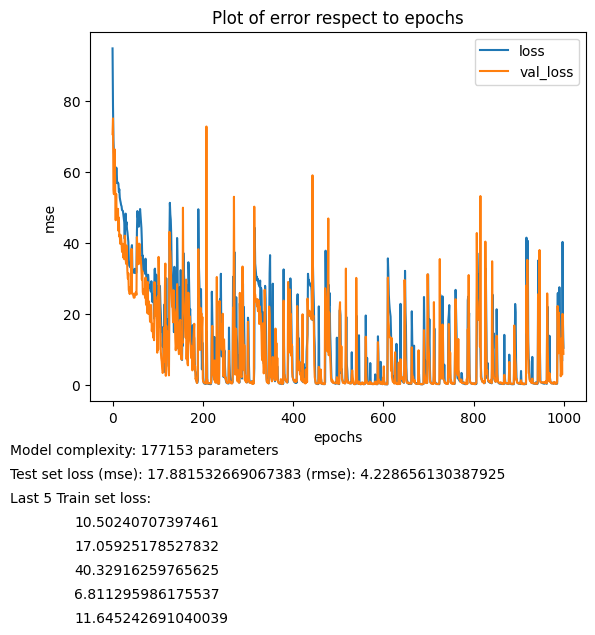

In [29]:
#plotting of training information
plt.plot(range(num_epochs),history.history['loss'])
plt.plot(range(num_epochs),history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.title('Plot of error respect to epochs')
#plt.ylim([0, 1e-1])
plt.figtext(0, 0, "Model complexity: "+str(model.count_params())+" parameters", fontsize=10)
plt.figtext(0, -0.05, "Test set loss (mse): "+str(test_eval)+" (rmse): "+str(math.sqrt(test_eval)), fontsize=10)
plt.figtext(0, -0.1, "Last 5 Train set loss:", fontsize=10)
plt.figtext(0.1, -0.15, str(history.history['loss'][-1]), fontsize=10)
plt.figtext(0.1, -0.2, str(history.history['loss'][-2]), fontsize=10)
plt.figtext(0.1, -0.25, str(history.history['loss'][-3]), fontsize=10)
plt.figtext(0.1, -0.3, str(history.history['loss'][-4]), fontsize=10)
plt.figtext(0.1, -0.35, str(history.history['loss'][-5]), fontsize=10)
plt.show()

# Empirical testing

In [41]:
emp_test = np.array([-2.9219,3.009,4.4996,45])
emp_test = np.reshape(emp_test,(1,4))
#emp_test = ss.transform(emp_test)

In [42]:
model.predict(emp_test)

1/1 [==============================] - 0s 20ms/step


array([[37.710503]], dtype=float32)

# Scatter plot

In [18]:
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model.predict(k))) 
    return pred

In [19]:
pred = predictions(X_test)

In [22]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

17.88152845494556

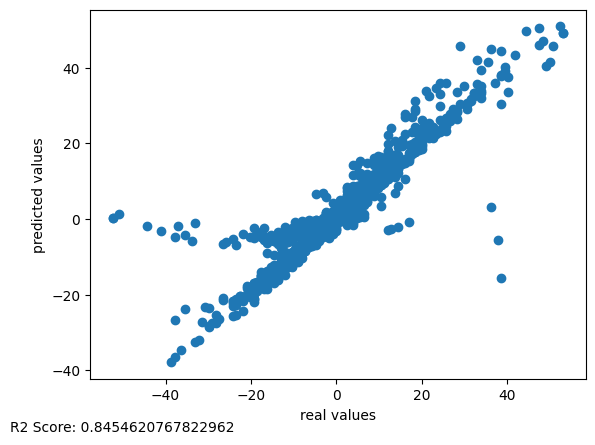

In [23]:
import sklearn
sklearn.metrics.r2_score(y_test,pred)

plt.scatter(y_test,pred)
plt.ylabel('predicted values')
plt.xlabel('real values')
plt.figtext(0, 0, "R2 Score: "+str(sklearn.metrics.r2_score(y_test,pred)), fontsize=10)
plt.show()